In [35]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
import math
import random
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import numpy as np

In [36]:
actionDict = {}
for i in range(51): # 51 labels, each i correspondes to action i
    actionDict[i] = {}
    for j in range(51):
        actionDict[i][j] = 0.0

In [37]:
# Array of all CSV files
csvArray = [ 
"00EABED2-271D-49D8-B599-1D4A09240601.features_labels.csv" , "098A72A5-E3E5-4F54-A152-BBDA0DF7B694.features_labels.csv",
"0A986513-7828-4D53-AA1F-E02D6DF9561B.features_labels.csv" , "0BFC35E2-4817-4865-BFA7-764742302A2D.features_labels.csv",
"0E6184E1-90C0-48EE-B25A-F1ECB7B9714E.features_labels.csv" , "1155FF54-63D3-4AB2-9863-8385D0BD0A13.features_labels.csv", 
"11B5EC4D-4133-4289-B475-4E737182A406.features_labels.csv" , "136562B6-95B2-483D-88DC-065F28409FD2.features_labels.csv",
"1538C99F-BA1E-4EFB-A949-6C7C47701B20.features_labels.csv" , "1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842.features_labels.csv",
"24E40C4C-A349-4F9F-93AB-01D00FB994AF.features_labels.csv" , "27E04243-B138-4F40-A164-F40B60165CF3.features_labels.csv",
"2C32C23E-E30C-498A-8DD2-0EFB9150A02E.features_labels.csv" , "33A85C34-CFE4-4732-9E73-0A7AC861B27A.features_labels.csv",
"3600D531-0C55-44A7-AE95-A7A38519464E.features_labels.csv" , "40E170A7-607B-4578-AF04-F021C3B0384A.features_labels.csv",    
"481F4DD2-7689-43B9-A2AA-C8772227162B.features_labels.csv" , "4E98F91F-4654-42EF-B908-A3389443F2E7.features_labels.csv",
"4FC32141-E888-4BFF-8804-12559A491D8C.features_labels.csv" , "5119D0F8-FCA8-4184-A4EB-19421A40DE0D.features_labels.csv",        
"5152A2DF-FAF3-4BA8-9CA9-E66B32671A53.features_labels.csv" , "59818CD2-24D7-4D32-B133-24C2FE3801E5.features_labels.csv",
"59EEFAE0-DEB0-4FFF-9250-54D2A03D0CF2.features_labels.csv" , "5EF64122-B513-46AE-BCF1-E62AAC285D2C.features_labels.csv",
"61359772-D8D8-480D-B623-7C636EAD0C81.features_labels.csv" , "61976C24-1C50-4355-9C49-AAE44A7D09F6.features_labels.csv",
"665514DE-49DC-421F-8DCB-145D0B2609AD.features_labels.csv" , "74B86067-5D4B-43CF-82CF-341B76BEA0F4.features_labels.csv",
"78A91A4E-4A51-4065-BDA7-94755F0BB3BB.features_labels.csv" , "797D145F-3858-4A7F-A7C2-A4EB721E133C.features_labels.csv",
"7CE37510-56D0-4120-A1CF-0E23351428D2.features_labels.csv" , "7D9BB102-A612-4E2A-8E22-3159752F55D8.features_labels.csv",
"8023FE1A-D3B0-4E2C-A57A-9321B7FC755F.features_labels.csv" , "806289BC-AD52-4CC1-806C-0CDB14D65EB6.features_labels.csv",
"81536B0A-8DBF-4D8A-AC24-9543E2E4C8E0.features_labels.csv" , "83CF687B-7CEC-434B-9FE8-00C3D5799BE6.features_labels.csv",
"86A4F379-B305-473D-9D83-FC7D800180EF.features_labels.csv" , "96A358A0-FFF2-4239-B93E-C7425B901B47.features_labels.csv",
"9759096F-1119-4E19-A0AD-6F16989C7E1C.features_labels.csv" , "99B204C0-DD5C-4BB7-83E8-A37281B8D769.features_labels.csv",
"9DC38D04-E82E-4F29-AB52-B476535226F2.features_labels.csv" , "A5A30F76-581E-4757-97A2-957553A2C6AA.features_labels.csv",
"A5CDF89D-02A2-4EC1-89F8-F534FDABDD96.features_labels.csv" , "A7599A50-24AE-46A6-8EA6-2576F1011D81.features_labels.csv",
"A76A5AF5-5A93-4CF2-A16E-62353BB70E8A.features_labels.csv" , "B09E373F-8A54-44C8-895B-0039390B859F.features_labels.csv",
"B7F9D634-263E-4A97-87F9-6FFB4DDCB36C.features_labels.csv" , "B9724848-C7E2-45F4-9B3F-A1F38D864495.features_labels.csv",
"BE3CA5A6-A561-4BBD-B7C9-5DF6805400FC.features_labels.csv" , "BEF6C611-50DA-4971-A040-87FB979F3FC1.features_labels.csv",
"C48CE857-A0DD-4DDB-BEA5-3A25449B2153.features_labels.csv" , "CA820D43-E5E2-42EF-9798-BE56F776370B.features_labels.csv",
"CCAF77F0-FABB-4F2F-9E24-D56AD0C5A82F.features_labels.csv" , "CDA3BBF7-6631-45E8-85BA-EEB416B32A3C.features_labels.csv",
"CF722AA9-2533-4E51-9FEB-9EAC84EE9AAC.features_labels.csv" , "D7D20E2E-FC78-405D-B346-DBD3FD8FC92B.features_labels.csv",
"E65577C1-8D5D-4F70-AF23-B3ADB9D3DBA3.features_labels.csv" , "ECECC2AB-D32F-4F90-B74C-E12A1C69BBE2.features_labels.csv",
"F50235E0-DD67-4F2A-B00B-1F31ADA998B9.features_labels.csv" , "FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF.features_labels.csv"
]

# Make a random train and test set
random.shuffle(csvArray)
trainArray = csvArray[:45] # Size 45
testArray = csvArray[45:] # Size 15

In [38]:
# This only cares about going from one single action to the next, it does not care about your current combination of actions
def train(csv, aDic):
    # Read in csv
    csvPath = "~/Downloads/ExtraSensory/" + csv
    sub_1 = pd.read_csv(csvPath)
    # Get the labels
    labels_only = sub_1.loc[:,'label:LYING_DOWN':'label:WITH_FRIENDS']
    # Convert it to its matrix because panda dataframes feel needlessly difficult to work with
    matrix = labels_only.as_matrix().tolist()
    # Clean up nans to 0.0 to indicate action did not take place (1.0 means the action corresponding to that index did occur)
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if math.isnan(matrix[i][j]):
                matrix[i][j] = 0.0
    # Remove all completely empty elements from array
    for i in range(len(matrix)):
        flag = True
        for j in range(len(matrix[i])):
            if matrix[i][j] != 0.0:
                flag = False
        if flag:
            matrix[i] = "delete"
    matrix = [x for x in matrix if x != "delete"]
    # Cleaning up matrix by only including the current actions being performed
    actionMatrix = []
    for i in range(len(matrix)):
        actions = []
        for j in range(len(matrix[i])):
            if matrix[i][j] == 1.0:
                actions.append(j)
        actionMatrix.append(actions)
    # Add to the dictionary
    for i in range(len(actionMatrix) - 1): # have to stop before the last one because no next action after that
        curActions = actionMatrix[i]
        nextActions = actionMatrix[i+1]
        if curActions != nextActions: # if actions didn't change, then no need to continue
            newActions = []
            for j in range(len(nextActions)):
                if nextActions[j] not in curActions:
                    newActions.append(nextActions[j]) # Get only the new actions, not the ones being continued
            for j in range(len(curActions)):
                for k in range(len(newActions)):
                    aDic[curActions[j]][newActions[k]] += 1.0 # Found a new action so add it to the dictionary
    return aDic

In [39]:
# Get your training dictionary (takes some time to run)
for i in range(len(trainArray)):
    actionDict = train (trainArray[i], actionDict) # Note that each call just updates the dictionary values, it doesn't start over

In [40]:
# Print training dictionary
print(actionDict) # Shows the trained results

{0: {0: 0.0, 1: 136.0, 2: 60.0, 3: 1.0, 4: 5.0, 5: 55.0, 6: 1.0, 7: 0.0, 8: 0.0, 9: 3.0, 10: 329.0, 11: 8.0, 12: 8.0, 13: 2.0, 14: 10.0, 15: 3.0, 16: 1311.0, 17: 0.0, 18: 18.0, 19: 8.0, 20: 16.0, 21: 1.0, 22: 0.0, 23: 2.0, 24: 18.0, 25: 11.0, 26: 3.0, 27: 5.0, 28: 12.0, 29: 41.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 1.0, 34: 28.0, 35: 15.0, 36: 22.0, 37: 43.0, 38: 48.0, 39: 23.0, 40: 0.0, 41: 5.0, 42: 7.0, 43: 0.0, 44: 164.0, 45: 11.0, 46: 42.0, 47: 5.0, 48: 81.0, 49: 1.0, 50: 10.0}, 1: {0: 181.0, 1: 0.0, 2: 1043.0, 3: 6.0, 4: 49.0, 5: 78.0, 6: 27.0, 7: 18.0, 8: 21.0, 9: 278.0, 10: 478.0, 11: 218.0, 12: 34.0, 13: 19.0, 14: 42.0, 15: 21.0, 16: 494.0, 17: 20.0, 18: 288.0, 19: 62.0, 20: 57.0, 21: 32.0, 22: 17.0, 23: 7.0, 24: 25.0, 25: 63.0, 26: 13.0, 27: 27.0, 28: 64.0, 29: 101.0, 30: 4.0, 31: 1.0, 32: 4.0, 33: 11.0, 34: 239.0, 35: 132.0, 36: 132.0, 37: 94.0, 38: 59.0, 39: 49.0, 40: 4.0, 41: 29.0, 42: 26.0, 43: 10.0, 44: 787.0, 45: 139.0, 46: 224.0, 47: 68.0, 48: 264.0, 49: 34.0, 50: 109.0}, 2:

{0: 16, 1: 2, 2: 1, 3: 2, 4: 1, 5: 16, 6: 2, 7: 2, 8: 2, 9: 1, 10: 16, 11: 1, 12: 2, 13: 2, 14: 2, 15: 2, 16: 1, 17: 2, 18: 1, 19: 10, 20: 1, 21: 1, 22: 1, 23: 16, 24: 16, 25: 1, 26: 1, 27: 1, 28: 44, 29: 16, 30: 0, 31: 0, 32: 1, 33: 10, 34: 1, 35: 2, 36: 44, 37: 1, 38: 1, 39: 1, 40: 2, 41: 1, 42: 1, 43: 1, 44: 1, 45: 2, 46: 48, 47: 1, 48: 16, 49: 2, 50: 1}
[  2.  23.  14.   0.   0.   0.   0.   0.   0.   0.   2.   0.   0.   0.   0.
   0.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.
   0.   0.   0.   1.   0.   0.]


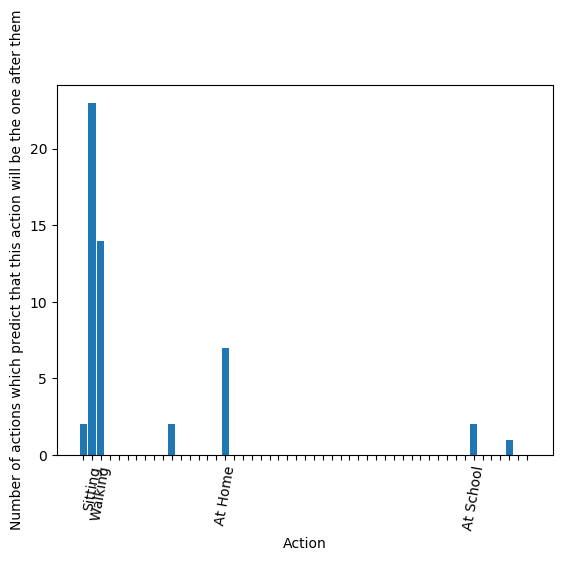

In [41]:
# Create a dictionary containing predicted next action for every action to speed up single action
predActionDict = {}
for i in range(51):
    curMax = -1
    curMaxIndex = -1
    for j in range(51):
        if actionDict[i][j] > curMax:
            curMax = actionDict[i][j]
            curMaxIndex = j
    predActionDict[i] = curMaxIndex
    
print(predActionDict)
actionPredFreq = np.zeros(51)
for i in range(51):
    for j in range(51):
        if predActionDict[j] == i:
            actionPredFreq[i] += 1
print(actionPredFreq)
plt.bar(np.arange(51), actionPredFreq)
plt.xlabel('Action')
plt.ylabel('Number of actions which predict that this action will be the one after them')
xlabels = ['' for x in range(51)]
xlabels[1] = "Sitting"
xlabels[2] = "Walking"
xlabels[16] = "At Home"
xlabels[44] = "At School"
xtickPoints = range(51)
plt.xticks(xtickPoints,xlabels, rotation = 80)
plt.show()

In [44]:
# This only cares about going from one single action to the next, it does not care about your current combination of actions
def testSingleAction(testData, predDic):
    
    total = 0.0
    correct = 0.0
    
    for idx in range(len(testData)):  
        # Read current csv
        csvPath = "./ExtraSensory/" + testData[idx]
        sub_1 = pd.read_csv(csvPath)
        # Get the labels
        labels_only = sub_1.loc[:,'label:LYING_DOWN':'label:WITH_FRIENDS']
         # Convert it to its matrix because panda dataframes feel needlessly difficult to work with
        matrix = labels_only.as_matrix().tolist()
        # Clean up nans to 0.0 to indicate action did not take place
        for i in range(len(matrix)):
            for j in range(len(matrix[i])):
                if math.isnan(matrix[i][j]):
                    matrix[i][j] = 0.0
        # Remove all completely empty elements from array
        for i in range(len(matrix)):
            flag = True
            for j in range(len(matrix[i])):
                if matrix[i][j] != 0.0:
                    flag = False
            if flag:
                matrix[i] = "delete"
        matrix = [x for x in matrix if x != "delete"]
        # Cleaning up matrix by only having the current actions being performed
        actionMatrix = []
        for i in range(len(matrix)):
            actions = []
            for j in range(len(matrix[i])):
                if matrix[i][j] == 1.0:
                    actions.append(j)
            actionMatrix.append(actions)
            
        # Start finding the actual accuracy, whereas the above part is the same preprocessing as in the training portion
        for i in range(len(actionMatrix) - 1): # have to stop before the last one because no next action after that
            curActions = actionMatrix[i]
            nextActions = actionMatrix[i+1]
            if curActions != nextActions: # Must have started at least one new action
                newActions = []
                for j in range(len(nextActions)): # Gets all the new (and only new) actions
                    if nextActions[j] not in curActions:
                        newActions.append(nextActions[j])
                # Actual accuracy part here:
                for j in range(len(curActions)): # For each current action then
                    total += 1.0
                    if predDic[j] in nextActions: # Check if the action you'd most likely predict to occur next did occur next
                        correct += 1.0 # (Note, other new actions could also have occured so long as predicted next action also did)
    
    #plt.bar()
    return total, correct

In [45]:
# Training Error Given Single Action
total, correct = testSingleAction(trainArray, predActionDict)
print (correct/total)

0.2788078871201158


In [46]:
# Test Error Given Single Action
total, correct = testSingleAction(testArray, predActionDict)
print (correct/total)

0.3421150278293135


In [47]:
# This predicts based on current combination of actions, not just a single action
# Code is largely repeated from above
def testActionCombination(testData, actionDic): # I did change the dictionary input
    
    total = 0.0
    correct = 0.0
    predActionFreq = [0]*51
    
    for idx in range(len(testData)):  
        # Read current csv
        csvPath = "./ExtraSensory/" + testData[idx]
        sub_1 = pd.read_csv(csvPath)
        # Get the labels
        labels_only = sub_1.loc[:,'label:LYING_DOWN':'label:WITH_FRIENDS']
         # Convert it to its matrix because panda dataframes feel needlessly difficult to work with
        matrix = labels_only.as_matrix().tolist()
        # Clean up nans to 0.0 to indicate action did not take place
        for i in range(len(matrix)):
            for j in range(len(matrix[i])):
                if math.isnan(matrix[i][j]):
                    matrix[i][j] = 0.0
        # Remove all completely empty elements from array
        for i in range(len(matrix)):
            flag = True
            for j in range(len(matrix[i])):
                if matrix[i][j] != 0.0:
                    flag = False
            if flag:
                matrix[i] = "delete"
        matrix = [x for x in matrix if x != "delete"]
        # Cleaning up matrix by only having the current actions being performed
        actionMatrix = []
        for i in range(len(matrix)):
            actions = []
            for j in range(len(matrix[i])):
                if matrix[i][j] == 1.0:
                    actions.append(j)
            actionMatrix.append(actions)
            
        
        # Start finding the actual accuracy, whereas the above part is the same preprocessing as in the training portion
        for i in range(len(actionMatrix) - 1): # have to stop before the last one because no next action after that
            curActions = actionMatrix[i]
            nextActions = actionMatrix[i+1]
            if curActions != nextActions: # Must have started at least one new action
                newActions = []
                for j in range(len(nextActions)): # Gets all the new (and only new) actions
                    if nextActions[j] not in curActions:
                        newActions.append(nextActions[j])
                        
                # Actual accuracy part here (also the major changes from the other test function too):
                predArray = [0] * 51
                for j in range(len(curActions)): # For each current action 
                    curAction = curActions[j]
                    for k in range(0, 51):       # and for each possible next action then:
                        if k not in curActions: 
                            predArray[k] += actionDic[curAction][k] # Add how many times each next action occured after current action (k represents next action)
                predAction = -1
                maxValue = -1
                for j in range(len(predArray)):
                    if predArray[j] > maxValue:
                        maxValue = predArray[j]
                        predAction = j
                total += 1.0
                predActionFreq[predAction] += 1
                if predAction in nextActions: # Check if the action you'd most likely predict to occur next did occur next
                    correct += 1.0 # (Note, other new actions could also have occured so long as predicted next action also did)
    plt.bar(np.arange(51), predActionFreq)
    plt.xlabel('Action')
    plt.ylabel('Number of times that action is switched to')
    xlabels = ['' for x in range(51)]
    xlabels[1] = "Sitting"
    xlabels[2] = "Walking"
    xlabels[16] = "At Home"
    xlabels[44] = "At School"
    xtickPoints = range(51)
    plt.xticks(xtickPoints,xlabels, rotation = 80)
    plt.show()
    return total, correct

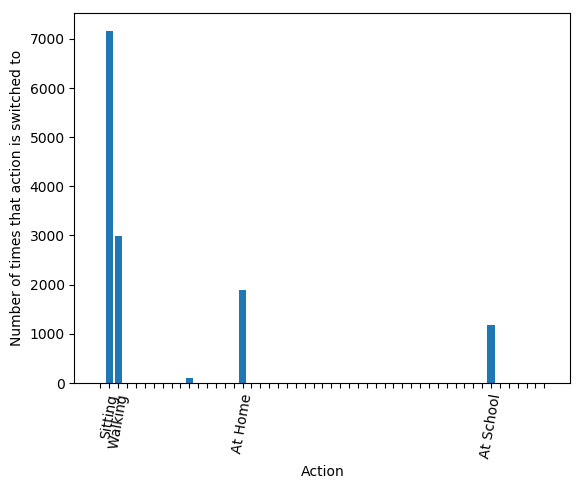

0.36120702597207627


In [48]:
# Training Error Given Multiple Action
total, correct = testActionCombination(trainArray, actionDict)
print (correct/total)

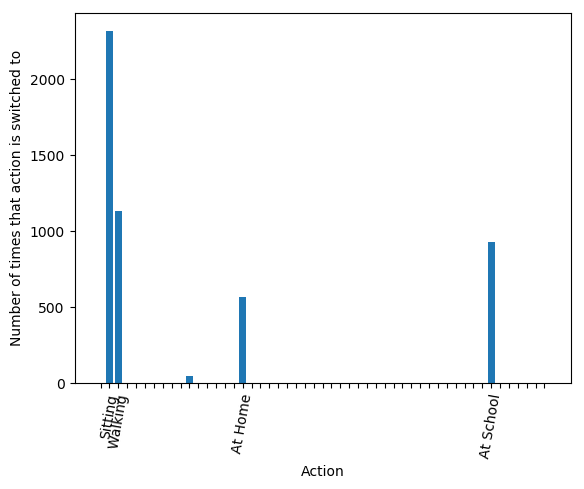

0.2981366459627329


In [49]:
# Test Error Given Multiple Action
total, correct = testActionCombination(testArray, actionDict)
print (correct/total)

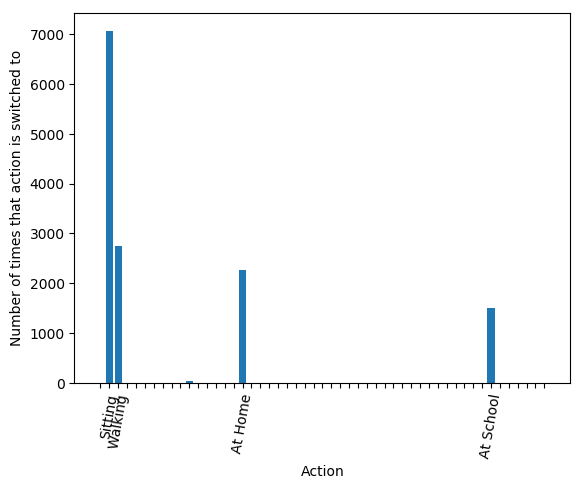

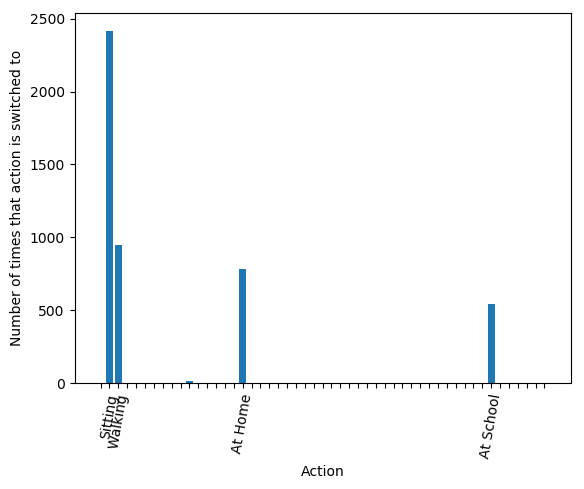

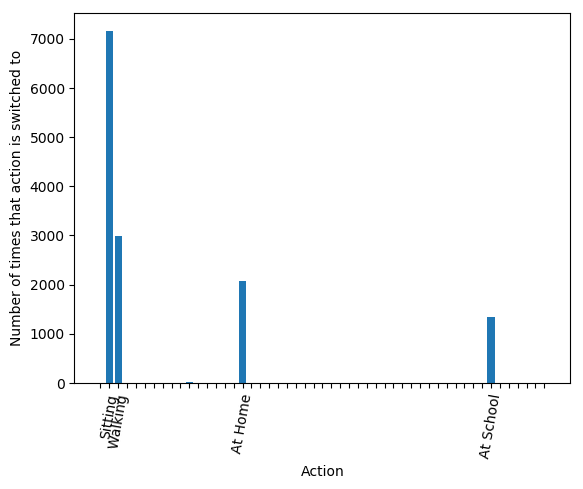

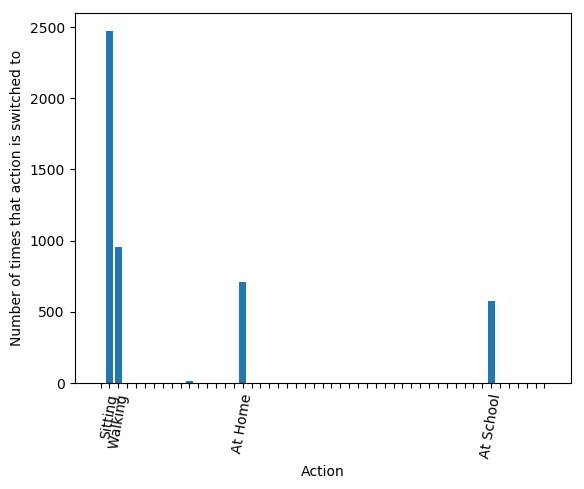

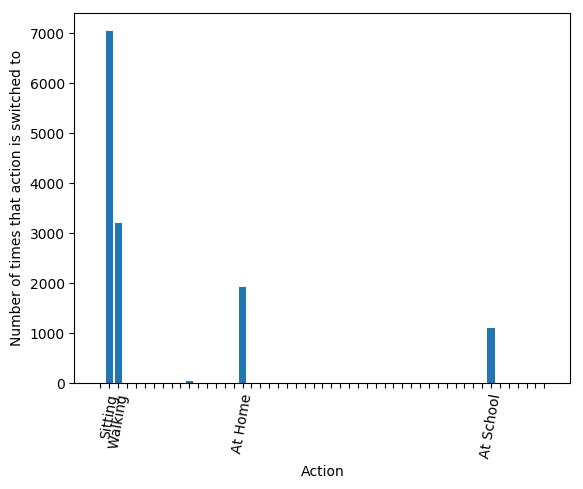

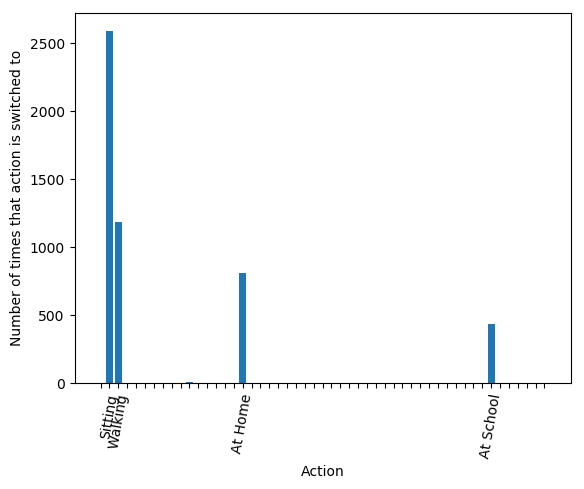

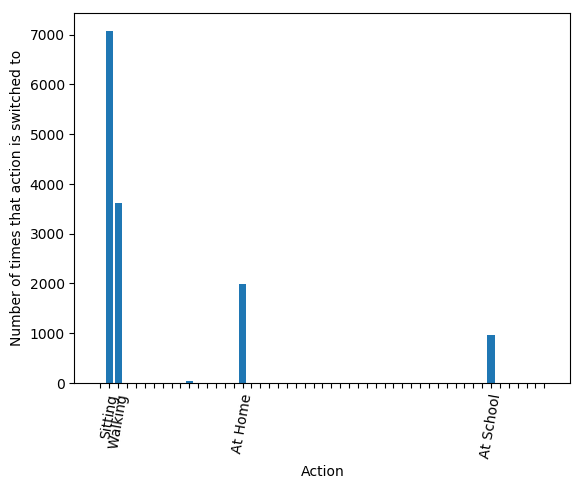

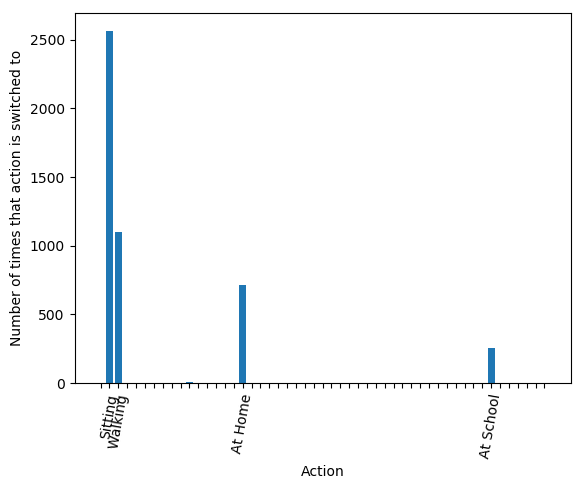

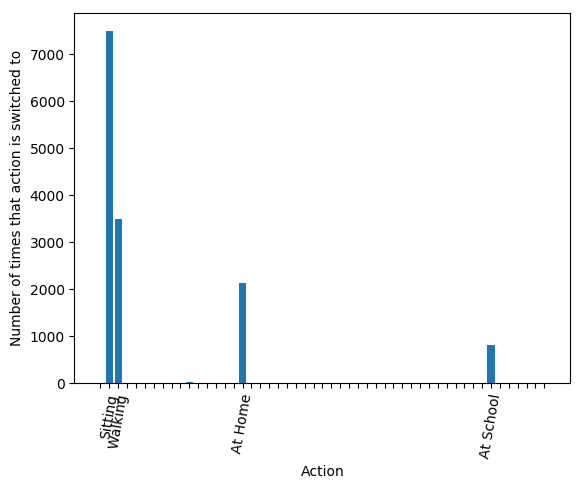

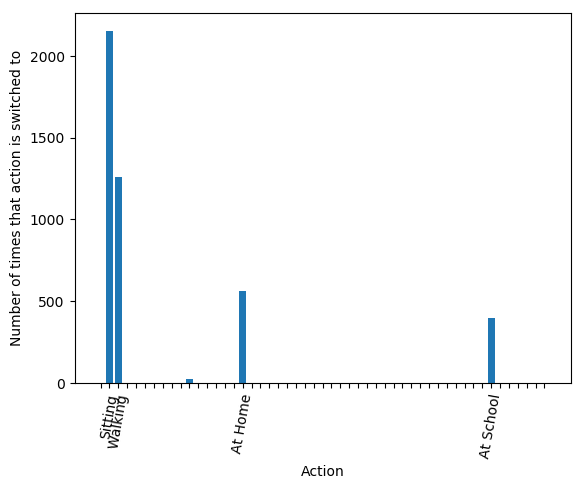

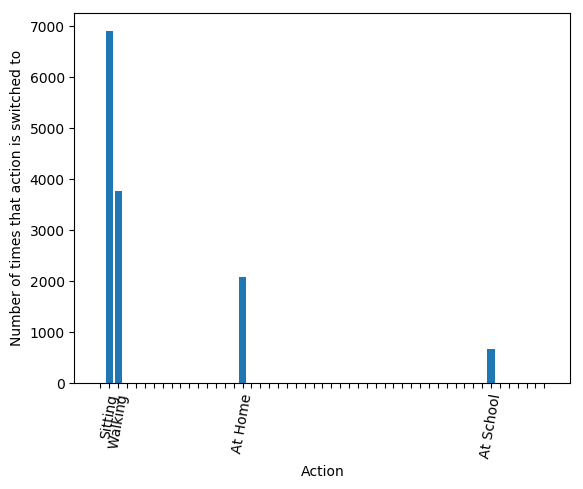

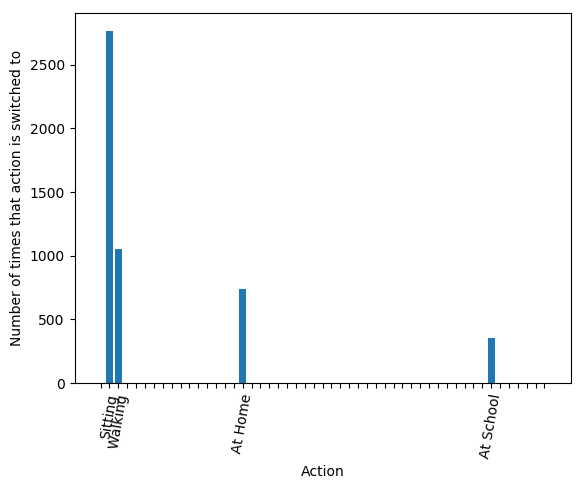

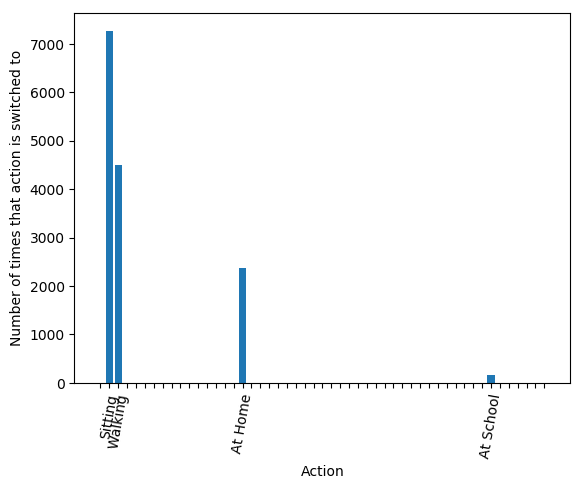

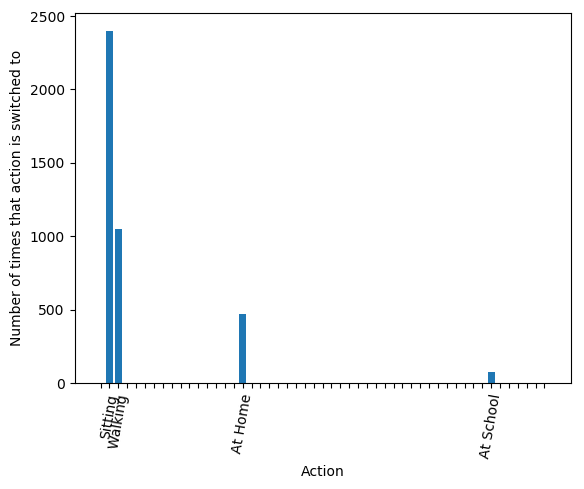

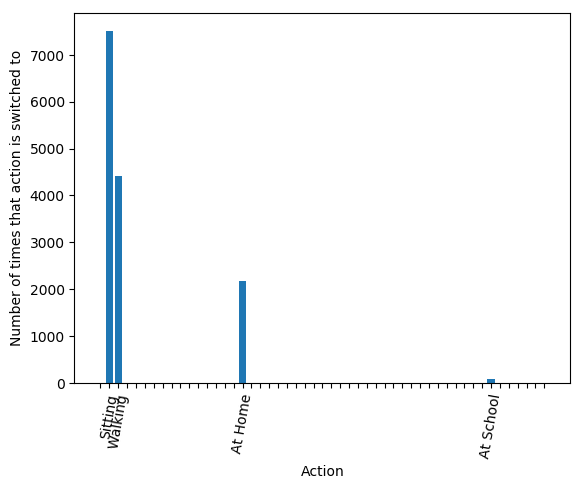

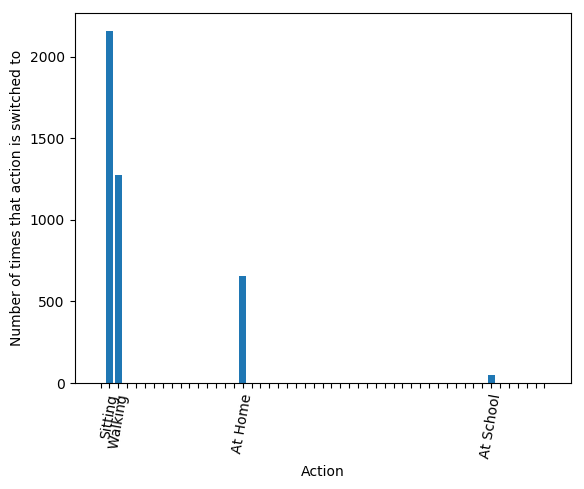

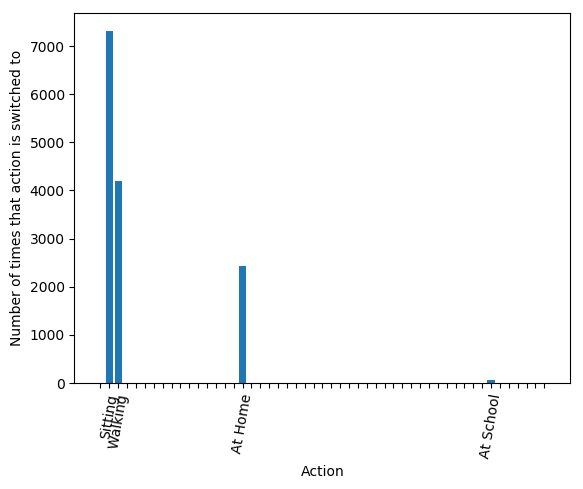

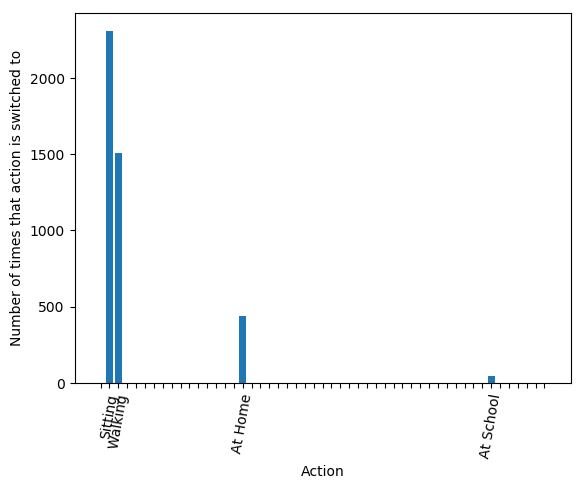

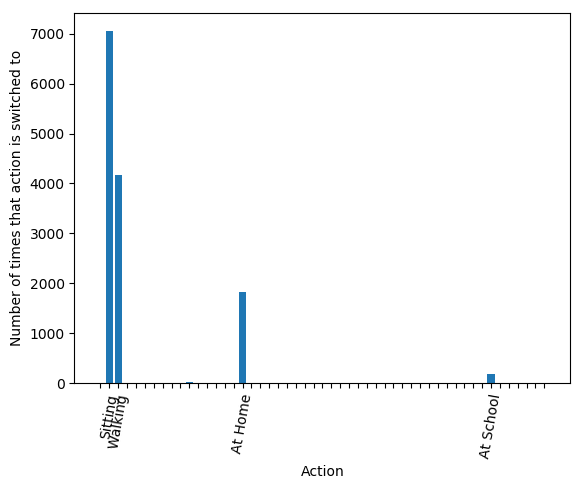

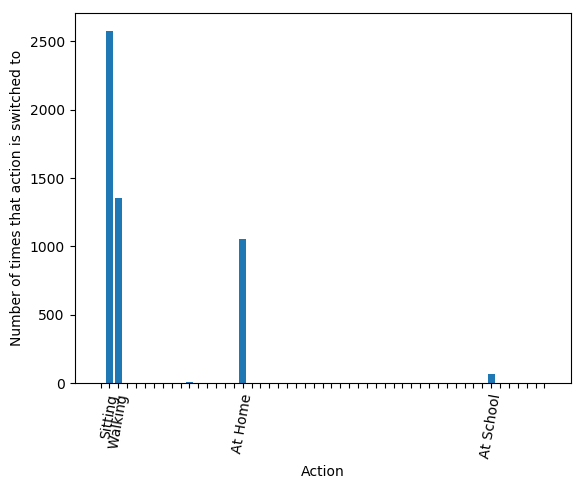

Given Single Action Training Error:
0.29243986258241783
Given Single Action Testing Error:
0.30555218907127096
Given Multiple Actions Training Error:
0.34230829504865234
Given Multiple Actions Testing Error:
0.3305658039418403


In [50]:
# This basically takes code from above, and runs it 10 times to see the average results; will take a long while to run
sTrain = []
sTest = []
mTrain = []
mTest = []
for i in range(10):
    # Make a random train and test set
    random.shuffle(csvArray)
    trainArray = csvArray[:45] # Size 45
    testArray = csvArray[45:] # Size 15
    
    # Get your training dictionary
    for j in range(len(trainArray)):
        actionDict = train (trainArray[j], actionDict)
       
    # Make predicted action dict
    predActionDict = {}
    for j in range(51):
        curMax = -1
        curMaxIndex = -1
        for k in range(51):
            if actionDict[j][k] > curMax:
                curMax = actionDict[j][k]
                curMaxIndex = k
        predActionDict[j] = curMaxIndex
        
    # Training Error Given Single Action
    total, correct = testSingleAction(trainArray, predActionDict)
    sTrain.append(correct/total)
    # Test Error Given Single Action
    total, correct = testSingleAction(testArray, predActionDict)
    sTest.append(correct/total)
    # Training Error Given Multiple Action
    total, correct = testActionCombination(trainArray, actionDict)
    mTrain.append(correct/total)
    # Test Error Given Multiple Action
    total, correct = testActionCombination(testArray, actionDict)
    mTest.append(correct/total)
    
print ("Given Single Action Training Error:")
total = 0.0
for i in range(len(sTrain)):
    total += sTrain[i]
print (total/len(sTrain))
print ("Given Single Action Testing Error:")
total = 0.0
for i in range(len(sTest)):
    total += sTest[i]
print (total/len(sTest))
print ("Given Multiple Actions Training Error:")
total = 0.0
for i in range(len(mTrain)):
    total += mTrain[i]
print (total/len(mTrain))
print ("Given Multiple Actions Testing Error:")
total = 0.0
for i in range(len(mTest)):
    total += mTest[i]
print (total/len(mTest))